In [370]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
#from datetime 
import datetime
import wordcloud
import plotly.express as px

import plotly.offline as py
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
py.init_notebook_mode(connected = True) 
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"
# pd.set_option('display.max_columns', None)
"Imported packages"

'Imported packages'

In [371]:
%pwd  #look at the current work dir
# %cd   #change to the dir you want 

'/Users/melodywong/Python Work 2020'

In [372]:
netflix_df = pd.read_csv('netflix_titles.csv', parse_dates=[6])
netflix_df= netflix_df.rename(columns={'listed_in':'genre','release_year': 'year'})
netflix_df['title'] = netflix_df['title'].str.lower()
netflix_df.head()
# netflix_df.info()

,show_id,type,title,director,cast,country,date_added,year,rating,duration,genre,description
0,81145628,Movie,norm of the north: king sized adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,jandino: whatever it takes,NaN,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,transformers prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,transformers: robots in disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [373]:
# netflix_df[netflix_df['type'] == 'TV Show']
netflix_df['season_count'] = netflix_df.apply(lambda x : x['duration'].split(" ")[0] if "Season" in x['duration'] else "", axis = 1)
netflix_df['duration'] = netflix_df.apply(lambda x : x['duration'].split(" ")[0] if "Season" not in x['duration'] else "", axis = 1)


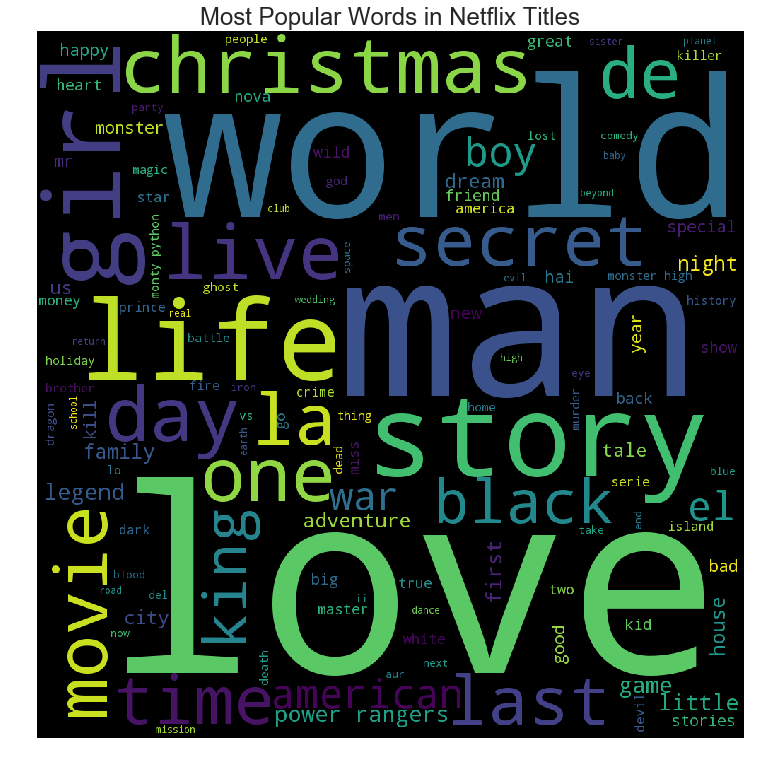

In [374]:
#Generate a Wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
plt.rcParams['figure.figsize'] = (13, 13)
wordcloud = WordCloud(stopwords=STOPWORDS,background_color = 'black', width = 1000,  height = 1000, max_words = 121).generate(" ".join(netflix_df['title']))
  
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Words in Netflix Titles',fontsize = 24)
plt.show()

In [375]:
netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
year               0
rating            10
duration           0
genre              0
description        0
season_count       0
dtype: int64

In [376]:
netflix_df['country']= netflix_df['country'].fillna("United States")
netflix_df['primary_country'] = netflix_df['country'].apply(lambda x: x.split(',')[0])
netflix_df['genre']= netflix_df['genre'].fillna("Unknown")
netflix_df['genre'] = netflix_df['genre'].apply(lambda x: x.split(',')[0])

Movie      4265
TV Show    1969
Name: type, dtype: int64


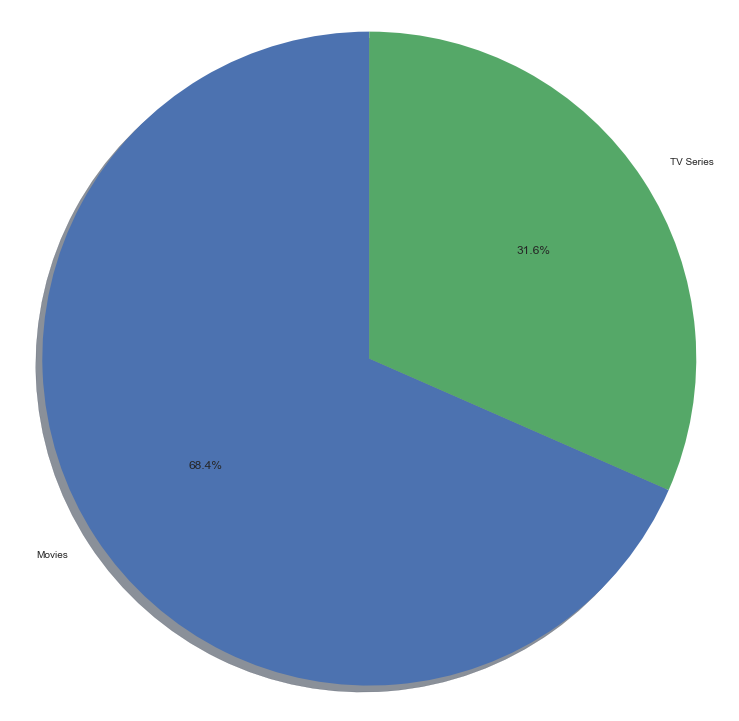

In [378]:
labels = 'Movies','TV Series'
sr = pd.Series(netflix_df['type'])
x = sr.value_counts()
print(x)
fig1, ax1 = plt.subplots()
ax1.pie(x, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [379]:
temp_df1 = movies['year'].value_counts().reset_index()
temp_df2 = tv['year'].value_counts().reset_index()


# create trace1
trace1 = go.Bar(
                x = temp_df1['index'],
                y = temp_df1['year'],
                name="TV Shows",
                marker = dict(color = 'rgb(249, 6, 6)'))
# create trace2 
trace2 = go.Bar(
                x = temp_df2['index'],
                y = temp_df2['year'],
                name = "Movies",
                marker = dict(color = 'rgb(26, 118, 255)'))


layout = go.Layout(template= "plotly_dark",title = 'CONTENT RELEASE OVER THE YEAR BY CONTENT TYPE' , xaxis = dict(title = 'Year'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace1, trace2], layout = layout)
fig.show()

In [380]:
movies = netflix_df[netflix_df['type'] == 'Movie'].drop(['type'], axis = 1)
tv = netflix_df[netflix_df['type'] == 'TV Show'].drop(['type'], axis = 1)

In [381]:
#for each country list most popular genre
from collections import Counter
genre = netflix_df['genre']
genre_count = pd.Series(dict(Counter(','.join(genre).replace(' ,',',').replace(', ',',')
                                       .split(',')))).sort_values(ascending=False)

genre_count

Dramas                          1077
Comedies                         803
Documentaries                    644
Action & Adventure               597
International TV Shows           570
Children & Family Movies         358
Crime TV Shows                   309
Kids' TV                         288
Stand-Up Comedy                  273
British TV Shows                 210
Horror Movies                    205
Docuseries                       148
Anime Series                     117
TV Comedies                       89
International Movies              85
Reality TV                        63
Classic Movies                    62
Movies                            56
TV Dramas                         56
Thrillers                         40
TV Action & Adventure             30
Stand-Up Comedy & Talk Shows      28
Romantic TV Shows                 21
Classic & Cult TV                 19
Independent Movies                18
Music & Musicals                  12
Anime Features                    12
C

In [382]:
# pivot = netflix_df[netflix_df.type == 'Movie'].pivot_table(index=['genre','primary_country'], values=['show_id'], aggfunc='count')
# pivot

In [383]:
# import matplotlib.pyplot as plt
# sns.set()  # use Seaborn styles
# netflix_df[netflix_df.type == 'Movie'].pivot_table(index=['primary_country','genre'], values=['show_id'], aggfunc='count').plot()
# plt.show()

In [384]:
country = netflix_df['country'].dropna()
country_count = pd.Series(dict(Counter(','.join(country).replace(' ,',',').replace(', ',',')
                                       .split(',')))).sort_values(ascending=False)

In [385]:
# netflix_df['genre_country'] = netflix_df['primary_country'] + '&' + netflix_df['genre']
# netflix_df['genre_country'].head()

In [386]:
# netflix_df_c = netflix_df['genre_country']
# netflix_df_count = pd.Series(dict(Counter(','.join(netflix_df_c).replace(' ,',',').replace(', ',',')
#                                        .split(',')))).sort_values(ascending=False)

In [387]:
# ## Printing top 20 countries 
# netflix_data_top = netflix_df_count[:20]
# plt.figure(figsize=(20,12))
# sns.barplot(netflix_data_top, netflix_data_top.index)
# plt.show()

In [388]:
from collections import Counter
col = "genre"
categories = ", ".join(movies['genre']).split(", ")
counter_list = Counter(categories).most_common(50)
labels = [_[0] for _ in counter_list][::-1]
values = [_[1] for _ in counter_list][::-1]
trace1 = go.Bar(y=labels, x=values, orientation="h", name="Movie")
data = [trace1]
layout = go.Layout(title="Content added over the years", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()


In [389]:
#TOP ACTORS IN MOVIES
def country_trace(country, flag = "movie"):
    netflix_df["from_us"] = netflix_df['country'].fillna("").apply(lambda x : 1 if country.lower() in x.lower() else 0)
    small = netflix_df[netflix_df["from_us"] == 1]
    if flag == "movie":
        small = small[small["duration"] != ""]
    else:
        small = small[small["season_count"] != ""]
    cast = ", ".join(small['cast'].fillna("")).split(", ")
    tags = Counter(cast).most_common(25)
    tags = [_ for _ in tags if "" != _[0]]

    labels, values = [_[0]+"  " for _ in tags], [_[1] for _ in tags]
    trace = go.Bar(y=labels[::-1], x=values[::-1], orientation="h", name="", marker=dict(color="#a678de"))
    return trace

from plotly.subplots import make_subplots
traces = []
titles = ["United States", "","India","", "United Kingdom", "Canada","", "Spain","", "Japan"]
for title in titles:
    if title != "":
        traces.append(country_trace(title))

fig = make_subplots(rows=2, cols=5, subplot_titles=titles)
fig.add_trace(traces[0], 1,1)
fig.add_trace(traces[1], 1,3)
fig.add_trace(traces[2], 1,5)
fig.add_trace(traces[3], 2,1)
fig.add_trace(traces[4], 2,3)
fig.add_trace(traces[5], 2,5)

fig.update_layout(height=1200, showlegend=False)
fig.show()


In [390]:
#TOP ACTORS IN TV SHOWS
def country_trace(country, flag = "tv_show"):
    netflix_df["from_us"] = netflix_df['country'].fillna("").apply(lambda x : 1 if country.lower() in x.lower() else 0)
    small = netflix_df[netflix_df["from_us"] == 1]
    if flag == "tv_show":
        small = small[small["season_count"] != ""]
    else:
        small = small[small["duration"] != ""]
    cast = ", ".join(small['cast'].fillna("")).split(", ")
    tags = Counter(cast).most_common(25)
    tags = [_ for _ in tags if "" != _[0]]

    labels, values = [_[0]+"  " for _ in tags], [_[1] for _ in tags]
    trace = go.Bar(y=labels[::-1], x=values[::-1], orientation="h", name="", marker=dict(color="#a678de"))
    return trace

from plotly.subplots import make_subplots
traces = []
titles = ["United States", "","India","", "United Kingdom", "Canada","", "Spain","", "Japan"]
for title in titles:
    if title != "":
        traces.append(country_trace(title))

fig = make_subplots(rows=2, cols=5, subplot_titles=titles)
fig.add_trace(traces[0], 1,1)
fig.add_trace(traces[1], 1,3)
fig.add_trace(traces[2], 1,5)
fig.add_trace(traces[3], 2,1)
fig.add_trace(traces[4], 2,3)
fig.add_trace(traces[5], 2,5)

fig.update_layout(height=1200, showlegend=False)
fig.show()


In [391]:
#TV SHOW RATINGS
def country_trace(country, flag = "tv_show"):
    netflix_df["from_us"] = netflix_df['country'].fillna("").apply(lambda x : 1 if country.lower() in x.lower() else 0)
    small = netflix_df[netflix_df["from_us"] == 1]
    if flag == "tv_show":
        small = small[small["season_count"] != ""]
    else:
        small = small[small["duration"] != ""]
    cast = ", ".join(small['rating'].fillna("")).split(", ")
    tags = Counter(cast).most_common(25)
    tags = [_ for _ in tags if "" != _[0]]

    labels, values = [_[0]+"  " for _ in tags], [_[1] for _ in tags]
    trace = go.Bar(y=labels[::-1], x=values[::-1], orientation="h", name="", marker=dict(color="#a678de"))
    return trace

from plotly.subplots import make_subplots
traces = []
titles = ["United States", "","India","", "United Kingdom", "Canada","", "Spain","", "Japan"]
for title in titles:
    if title != "":
        traces.append(country_trace(title))

fig = make_subplots(rows=2, cols=5, subplot_titles=titles)
fig.add_trace(traces[0], 1,1)
fig.add_trace(traces[1], 1,3)
fig.add_trace(traces[2], 1,5)
fig.add_trace(traces[3], 2,1)
fig.add_trace(traces[4], 2,3)
fig.add_trace(traces[5], 2,5)

fig.update_layout(height=1200, showlegend=False)
fig.show()


In [392]:
# imdb.csv
imdb_df = pd.read_csv('imdb.csv' , encoding='latin-1',usecols = ['title','imdbRating','ratingCount','type'
                                                                 ,'nrOfWins','year','nrOfNominations'
                                                                 ,'nrOfUserReviews'])
imdb_df['title'] = imdb_df['title'].str.lower()
imdb_df['title'] = imdb_df['title'].str.strip().str[:-7]
imdb_df['imdbRating'] = pd.to_numeric(imdb_df['imdbRating'], downcast='float', errors='coerce')
imdb_df.head()
# imdb_df.info()

,title,imdbRating,ratingCount,year,type,nrOfWins,nrOfNominations,nrOfUserReviews
0,der vagabund und das kind,8.4,40550,1921,video.movie,1,0,85
1,goldrausch,8.3,45319,1925,video.movie,2,1,122
2,metropolis,8.4,81007,1927,video.movie,3,4,376
3,der general,8.3,37521,1926,video.movie,1,1,219
4,lichter der groìùstadt,8.7,70057,1931,video.movie,2,0,186


In [429]:
netflix_df['year'] = netflix_df['year'].apply(str)
netflix_df.info() # year t

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 15 columns):
show_id            6234 non-null int64
type               6234 non-null object
title              6234 non-null object
director           4265 non-null object
cast               5664 non-null object
country            6234 non-null object
date_added         6223 non-null datetime64[ns]
year               6234 non-null object
rating             6224 non-null object
duration           6234 non-null object
genre              6234 non-null object
description        6234 non-null object
season_count       6234 non-null object
primary_country    6234 non-null object
from_us            6234 non-null int64
dtypes: datetime64[ns](1), int64(2), object(12)
memory usage: 730.6+ KB


In [430]:
# imdb_df[imdb_df['title'] == "rocky"] 

In [431]:
# netflix_df[netflix_df['title'] == "rocky"] 

In [432]:
show = pd.merge(netflix_df, imdb_df, on=['title','year'])

In [433]:
show.isnull().sum()
show.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252 entries, 0 to 251
Data columns (total 21 columns):
show_id            252 non-null int64
type_x             252 non-null object
title              252 non-null object
director           252 non-null object
cast               249 non-null object
country            252 non-null object
date_added         252 non-null datetime64[ns]
year               252 non-null object
rating             252 non-null object
duration           252 non-null object
genre              252 non-null object
description        252 non-null object
season_count       252 non-null object
primary_country    252 non-null object
from_us            252 non-null int64
imdbRating         250 non-null float32
ratingCount        250 non-null object
type_y             252 non-null object
nrOfWins           252 non-null object
nrOfNominations    252 non-null object
nrOfUserReviews    252 non-null int64
dtypes: datetime64[ns](1), float32(1), int64(3), object(16)
memory usa

In [434]:
us_shows=show[show['primary_country'] == 'United States']
us_shows.shape
us_shows.head(100)
us_shows.isnull().sum()

show_id            0
type_x             0
title              0
director           0
cast               3
country            0
date_added         0
year               0
rating             0
duration           0
genre              0
description        0
season_count       0
primary_country    0
from_us            0
imdbRating         0
ratingCount        0
type_y             0
nrOfWins           0
nrOfNominations    0
nrOfUserReviews    0
dtype: int64

In [441]:
us_shows['month_year'] = pd.to_datetime(us_shows['date_added']).dt.to_period('M').copy()
us_shows.head()

,show_id,type_x,title,director,cast,country,date_added,year,rating,duration,...,season_count,primary_country,from_us,imdbRating,ratingCount,type_y,nrOfWins,nrOfNominations,nrOfUserReviews,month_year
3,60000861,Movie,american psycho,Mary Harron,"Christian Bale, Willem Dafoe, Jared Leto, Rees...","United States, Canada",2019-09-01,2000,R,102,...,,United States,0,7.6,262553,video.movie,4,7,1007,2019-09
4,1151375,Movie,dante's peak,Roger Donaldson,"Pierce Brosnan, Linda Hamilton, Elizabeth Hoff...",United States,2019-09-01,1997,PG-13,108,...,,United States,0,5.8,50945,video.movie,4,0,238,2019-09
5,70056433,Movie,mr. woodcock,Craig Gillespie,"Billy Bob Thornton, Seann William Scott, Ethan...",United States,2019-09-01,2007,PG-13,88,...,,United States,0,5.1,28132,video.movie,0,0,75,2019-09
6,60031232,Movie,mystic river,Clint Eastwood,"Sean Penn, Tim Robbins, Kevin Bacon, Laurence ...","United States, Australia",2019-09-01,2003,R,138,...,,United States,0,8.0,274771,video.movie,61,68,902,2019-09
7,70044697,Movie,poseidon,Wolfgang Petersen,"Josh Lucas, Kurt Russell, Jacinda Barrett, Ric...",United States,2019-09-01,2006,PG-13,98,...,,United States,0,5.6,70125,video.movie,0,5,612,2019-09


In [478]:
x = us_shows.groupby('date_added')['imdbRating'].mean().reset_index()
x.head()

,date_added,imdbRating
0,2012-02-21,7.8
1,2016-12-12,8.1
2,2017-02-16,7.7
3,2017-03-16,7.7
4,2017-03-31,7.3


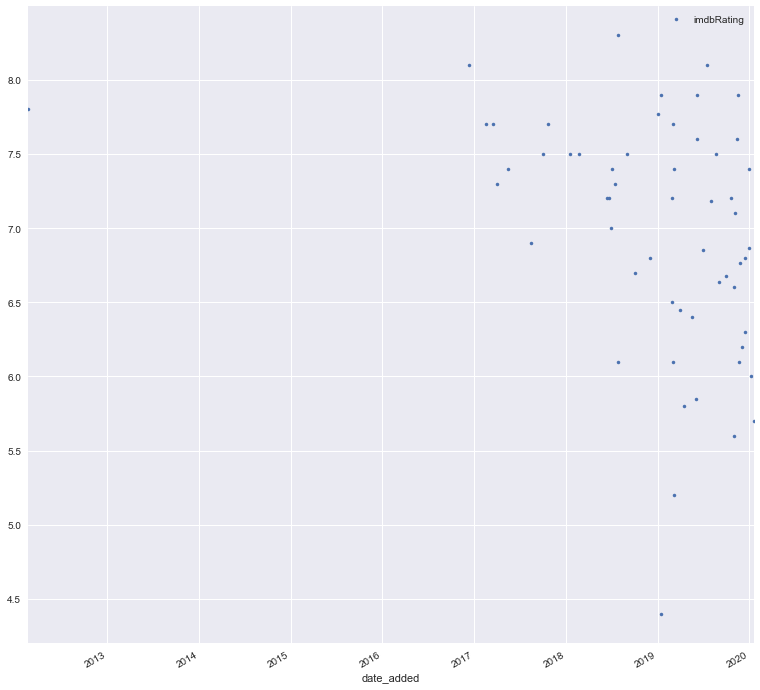

In [482]:
x.plot(x='date_added', y='imdbRating', style='.')
plt.show()

In [494]:
x['int_date_added'] = x['date_added'].astype(int)
x.head()
# df['date_new'] = df['date'].str.replace('\D', '').astype(int)
x.corr(method ='pearson') 

,imdbRating,int_date_added
imdbRating,1.000000,-0.356103
int_date_added,-0.356103,1.000000


In [407]:
# def country_trace(country, flag = "tv_show"):
#     netflix_df["from_us"] = netflix_df['country'].fillna("").apply(lambda x : 1 if country.lower() in x.lower() else 0)
#     small = netflix_df[netflix_df["from_us"] == 1]
# #     if flag == "tv_show":
# #         small = small[small["season_count"] != ""]
# #     else:
# #         small = small[small["duration"] != ""]
#     rating = ", ".join(small['rating'].fillna("")).split(", ")
#     tags = Counter(rating).most_common(25)
#     tags = [_ for _ in tags if "" != _[0]]

#     labels, values = [_[0]+"  " for _ in tags], [_[1] for _ in tags]
#     trace = go.Bar(y=labels[::-1], x=values[::-1], orientation="h", name="", marker=dict(color="#a678de"))
#     return trace

# from plotly.subplots import make_subplots
# traces = []
# titles = ["United States", "","India","", "United Kingdom", "Canada","", "Spain","", "Japan"]
# for title in titles:
#     if title != "":
#         traces.append(country_trace(title))

# fig = make_subplots(rows=2, cols=5, subplot_titles=titles)
# fig.add_trace(traces[0], 1,1)
# fig.add_trace(traces[1], 1,3)
# fig.add_trace(traces[2], 1,5)
# fig.add_trace(traces[3], 2,1)
# fig.add_trace(traces[4], 2,3)
# fig.add_trace(traces[5], 2,5)

# fig.update_layout(height=1200, showlegend=False)
# fig.show()


In [406]:
# df = shows[shows['imdbRating'].notnull()]
# df.reset_index(inplace = True, drop = True) 
# df.head()

In [408]:
# movie = df[df['type_x']=='Movie']
# movie.reset_index(inplace = True, drop = True) 
# movie = movie.drop(['year', 'type_y','nrOfWins','nrOfNominations','nrOfUserReviews'], axis=1)
# # movie.info()
# movie['imdbRating'] = movie['imdbRating'].astype('float64') 

In [ ]:
# plt.scatter(movie.imdbRating, movie.ratingCount)
# plt.show()

In [ ]:
# movie['imdbRating'] = movie['imdbRating'].astype(float)
# movie['ratingCount'] = movie['ratingCount'].astype(int)
# plt.scatter(x=movie['imdbRating'], y=movie['ratingCount'])
# plt.show()
# movie.info()

In [ ]:

# country = movies['primary_country'].unique()
# for i in range(len(country)):
#     plt.figure()
#     plt.plot(x[i],y[i])
#     # Show/save figure as desired.
#     plt.show()
# country

In [ ]:
# movies['genre'].value_counts()

In [ ]:
# import plotly.graph_objects as go
# # animals=['giraffes', 'orangutans', 'monkeys']

# fig = go.Figure(data=[
#     go.Bar(name='SF Zoo', x=movies['primary_country'],y = movies['genre'].value_counts())
# ])
# # Change the bar mode
# fig.update_layout(barmode='group')
# fig.show()

In [ ]:
# from collections import Counter
# col = "genre"
# movies["cast"].fillna("No Cast", inplace = True) 
# movies["country"].fillna("No Country", inplace = True) 
# categories = ", ".join(movies['cast']).split(", ")
# countries = ", ".join(movies['country']).split(", ")
# counter_list = Counter(categories).most_common(50)
# labels = [_[0] for _ in counter_list][::-1]
# values = [_[1] for _ in counter_list][::-1]
# trace1 = go.Bar(y=labels, x=values, orientation="h", name="Movie")
# data = [trace1]
# layout = go.Layout(title="Content added over the years", legend=dict(x=0.1, y=1.1, orientation="h"))
# fig = go.Figure(data, layout=layout)
# fig.show()

In [ ]:
# movies = netflix_df[netflix_df['type'] == 'Movie']

In [ ]:
# netflix_df['cast'] 

In [ ]:
# dif movies / tv show by country
# df movies/ tv
# sequel movies/ # seasons tv show
# actors most popular actor by country/ genre
# rec movies based on actors
# rac movies based on genres'



In [297]:
# def number_convert(imdbRating):
#     if imdbRating.str.isdigit():
#         return imdbRating
#     else:
#         return np.nan

In [323]:
# from collections import Counter
# col = "genre"
# movies["cast"].fillna("No Cast", inplace = True) 
# categories = ", ".join(movies['cast']).split(", ")
# counter_list = Counter(categories).most_common(50)
# labels = [_[0] for _ in counter_list][::-1]
# values = [_[1] for _ in counter_list][::-1]
# trace1 = go.Bar(y=labels, x=values, orientation="h", name="Movie")
# data = [trace1]
# layout = go.Layout(title="Content added over the years", legend=dict(x=0.1, y=1.1, orientation="h"))
# fig = go.Figure(data, layout=layout)
# # plt.bar(df['Age'], df['Sales']) 
# fig.show()
# #most popular actor by country